In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
import scipy.io.wavfile
from scipy.signal.windows import hamming

In [2]:
sample_rate, signal = scipy.io.wavfile.read("../../data/samples/akshay_khanna.wav")

In [3]:
signal = signal[:int(sample_rate * 3)].astype('float32')

In [34]:
def plot_signal(signal):
    plt.rcParams["figure.figsize"] = (20, 3)
    plt.plot(signal)
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.show()

def plot_spect(spect, power=1):
    plt.rcParams["figure.figsize"] = (5, 5)
    librosa.display.specshow(spect, x_axis='time')
    plt.axis('off')
    if power == 1:
        plt.title("Energy Spectrogram of dimensions: {}".format(spect.shape))
    else:
        plt.title("Power Spectrogram of dimensions: {}".format(spect.shape))
    plt.show()
    
def plot_mfcc(mfcc):
    plt.rcParams["figure.figsize"] = (5, 5)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.title("MFCC features of dimensions: {}".format(mfcc.shape))
    plt.show()

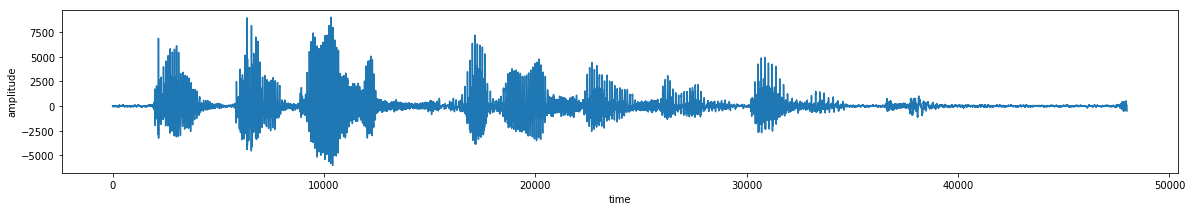

In [35]:
plot_signal(signal)


## Step 1: Pre-emphasis Filter and Windowing
### Pre-emphasis
Used to
1. balance the frequency spectrum since high frequencies usually have smaller magnitudes compared to lower frequencies
2. Improve SNR
3. Avoid Numerical Problems
 
 Pre-emphasis filter can be defined as:
                                    $y(t)=x(t)−αx(t−1)$
 where $α$ is the pre-emphasis coefficent (usually $=0.97$)
 
-> These days, it's rarely applied, since we are going to mean-normalize the features anyway

In [17]:
pre_emphasis = 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

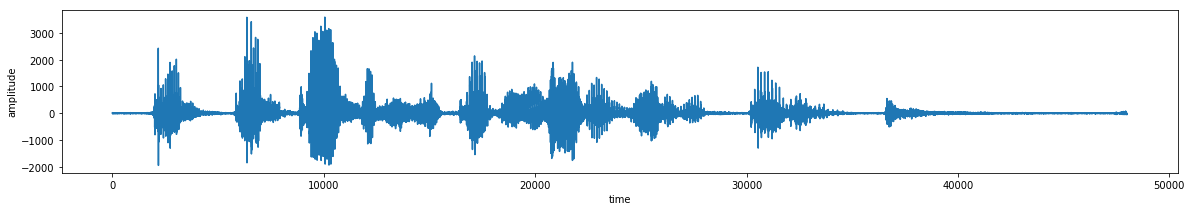

In [18]:
plot_signal(emphasized_signal)

## Spectrograms

### Step 1. Windowing and N-point FFT
#### Windowing
We apply window function on each frame, such as the Hamming window
Why?
To counteract the assumption made by FFT that the data is infinite

#### FFT
This is followed by an N-Point FFT over each frame, which is also called
Short Term Fourier Transform (STFT). 

We utilize librosa's stft function that does Framing + windowing + N-point FFT for us



In [19]:
frame_size, frame_stride = 0.02, 0.01

In [20]:
n_fft, win_len, hop_len = 512, int(frame_size * sample_rate), int(frame_stride * sample_rate)
n_fft, win_len, hop_len

(512, 320, 160)

In [21]:
D = librosa.stft(emphasized_signal, n_fft=n_fft, hop_length=hop_len,
                 win_length=n_fft, window=hamming)

D is an array of complex number. We'll separate the magnitude and phase information from it

In [22]:
spect, phase = librosa.magphase(D)
spect = np.log1p(spect)

Here, this intermediate "spect" is the Spectrogram features we're looking for.
However, they're not ready yet.
Depending on the "power" this "spect" is raised to, we obtain different kind of features

if $power=1$ we get Energy Spectrograms

if $power=2$, we get Power Spectrograms

In [24]:
power = 1
energy_spect = spect ** power

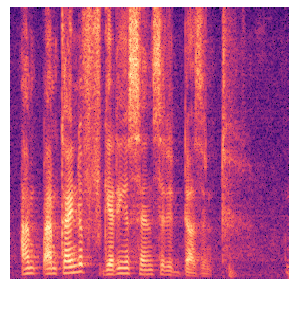

In [25]:
plot_spect(energy_spect)

In [26]:
power = 2
power_spect = spect ** power

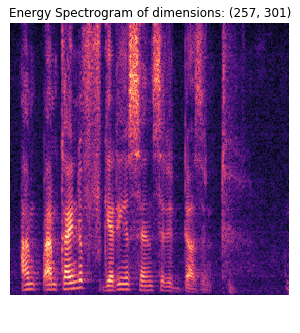

In [36]:
plot_spect(power_spect)

### MFCCs
#### Step 1: convert energy_spec above to mel scale, using the formula
$M(f) = 1124 \ln(1 + f/700)$
#### Step 2: Apply DCT on the output of step 1, to get MFCCs

We're gonna simply use librosa's implementation

In [28]:
mfcc = librosa.feature.mfcc(y=emphasized_signal, sr=sample_rate, n_fft=n_fft, n_mels=40)

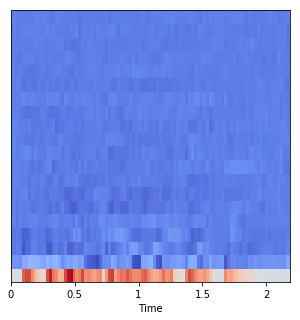

In [33]:
plot_mfcc(mfcc)